# 7. 分散分析
３つ以上の平均値差の検定のこと。t検定は3つ以上の平均値差の検定には使えない

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
%matplotlib inline
from itertools import cycle

sns.set(style='ticks')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [2]:
df = pd.read_csv('teaching_method.csv')
df

,ID,Name,Sex,Math,Statistics,Psychology_test,Statistics_test1,Statistics_test2,Method
0,1,大村,m,dislike,like,13,6,10,C
1,2,本多,m,dislike,like,14,10,13,B
2,3,川崎,m,like,like,7,6,8,B
3,4,多村,m,like,like,12,10,15,A
4,5,松中,m,dislike,dislike,10,5,8,B
5,6,小久保,m,dislike,dislike,6,3,6,C
6,7,柴原,m,dislike,dislike,8,5,9,A
7,8,井手,m,dislike,dislike,15,9,10,D
8,9,田上,m,dislike,dislike,4,3,7,D
9,10,松田,m,like,dislike,14,3,3,D


## 7.1 一元配置分散分析(対応なし)

### 7.1.1 一元配置分散分析を実行する
1. 帰無仮説$H_0$: 4群の母平均は等しい。\
対立仮説$H_1$: 4郡の母平均は等しくない。
2. 検定統計量の選択\
$ F = \cfrac{群間平方和 / 群間の自由度}{郡内平方和 / 郡内の自由度} $

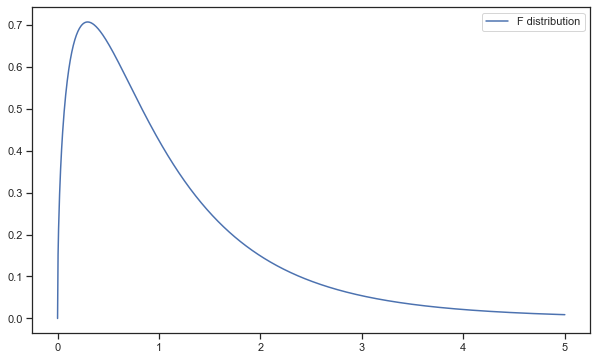

In [8]:
# F分布の描画
from scipy.stats import f
fig, ax = plt.subplots(1, 1, figsize=(10,6))

x = np.linspace(0, 5, 1000)
ax.plot(x, f.pdf(x, 3, 16), label='F distribution')
plt.legend()
plt.show()

4. 検定統計量の実現値を求める

In [12]:
A = df[df['Method']=='A']['Statistics_test2'].values
B = df[df['Method']=='B']['Statistics_test2'].values
C = df[df['Method']=='C']['Statistics_test2'].values
D = df[df['Method']=='D']['Statistics_test2'].values

In [20]:
# 検定統計量の実現値
stats.f_oneway(A, B, C, D)

F_onewayResult(statistic=7.111111111111112, pvalue=0.0029877831073873303)

p値が0.05よりも小さいので、帰無仮説を棄却する。\
つまり、5%水準で4つの指導法の間に有意な平均値差が見られたということが言える。

## 7.1.2 平方和の分解

In [21]:
all_data = pd.DataFrame({'A':A, 'B':B, 'C':C, 'D':D})
all_data

,A,B,C,D
0,15,13,10,10
1,9,8,6,7
2,18,8,11,3
3,14,12,7,5
4,18,7,12,7


In [22]:
group_avg = all_data.mean()
group_avg

A    14.8
B     9.6
C     9.2
D     6.4
dtype: float64

In [30]:
all_avg = np.mean(all_data.values)
all_avg

10.0

In [31]:
all_avg_df = pd.DataFrame(np.repeat(all_avg, 20).reshape(5,4))
all_avg_df

,0,1,2,3
0,10.0,10.0,10.0,10.0
1,10.0,10.0,10.0,10.0
2,10.0,10.0,10.0,10.0
3,10.0,10.0,10.0,10.0
4,10.0,10.0,10.0,10.0


In [37]:
group_avg_df = pd.DataFrame(np.repeat(group_avg.values, 5).reshape(4,5).T)
group_avg_df

,0,1,2,3
0,14.8,9.6,9.2,6.4
1,14.8,9.6,9.2,6.4
2,14.8,9.6,9.2,6.4
3,14.8,9.6,9.2,6.4
4,14.8,9.6,9.2,6.4


In [41]:
all_df = pd.DataFrame(all_data.values - all_avg_df.values)
all_df.columns = ['A', 'B', 'C', 'D']
all_df

,A,B,C,D
0,5.0,3.0,0.0,0.0
1,-1.0,-2.0,-4.0,-3.0
2,8.0,-2.0,1.0,-7.0
3,4.0,2.0,-3.0,-5.0
4,8.0,-3.0,2.0,-3.0


In [42]:
between_group = group_avg_df - all_avg_df
between_group

,0,1,2,3
0,4.8,-0.4,-0.8,-3.6
1,4.8,-0.4,-0.8,-3.6
2,4.8,-0.4,-0.8,-3.6
3,4.8,-0.4,-0.8,-3.6
4,4.8,-0.4,-0.8,-3.6


指導法Aを受けることで、平均点が全平均から4.8点押し上げられたと解釈できる。\
このような条件の違いで平均点が変わることを**効果**という。

In [43]:
in_group = pd.DataFrame(all_data.values - group_avg_df.values)
in_group.columns = ['A', 'B', 'C', 'D']
in_group

,A,B,C,D
0,0.2,3.4,0.8,3.6
1,-5.8,-1.6,-3.2,0.6
2,3.2,-1.6,1.8,-3.4
3,-0.8,2.4,-2.2,-1.4
4,3.2,-2.6,2.8,0.6


In [45]:
all_df**2

,A,B,C,D
0,25.0,9.0,0.0,0.0
1,1.0,4.0,16.0,9.0
2,64.0,4.0,1.0,49.0
3,16.0,4.0,9.0,25.0
4,64.0,9.0,4.0,9.0


In [46]:
between_group**2

,0,1,2,3
0,23.04,0.16,0.64,12.96
1,23.04,0.16,0.64,12.96
2,23.04,0.16,0.64,12.96
3,23.04,0.16,0.64,12.96
4,23.04,0.16,0.64,12.96


In [47]:
in_group**2

,A,B,C,D
0,0.04,11.56,0.64,12.96
1,33.64,2.56,10.24,0.36
2,10.24,2.56,3.24,11.56
3,0.64,5.76,4.84,1.96
4,10.24,6.76,7.84,0.36


In [49]:
# データ全体のばらつきの大きさを表しているといえる
all_squared_sum = np.sum((all_df**2).values)
all_squared_sum

322.0

In [50]:
# 郡の違いによって生じるばらつきを表しているといえる
between_group_squared_sum = np.sum((between_group**2).values)
between_group_squared_sum

184.00000000000003

In [51]:
# 全体で見たときに、同じ群の中での個人差の大きさを反映している
in_group_squared_sum = np.sum((in_group**2).values)
in_group_squared_sum

138.00000000000003

In [52]:
between_group_squared_sum + in_group_squared_sum

322.00000000000006

全体平方和 = 群間平方和 + 郡内平方和\
これを**平方和の分解**という。\
群の平均値の違いを、データのばらつきによって説明しようとするのが分散分析ということになる。

群間の自由度 = 郡の数 - 1\
郡内の自由度 = (各群のデータ数 - 1) をすべての群について合計したもの\
全体の自由度 = 全データ数 - 1

In [53]:
degree_between_group = len(all_data.columns) - 1
degree_between_group

3

In [54]:
degree_in_group = (len(all_data)-1)*(len(all_data.columns))
degree_in_group

16

In [55]:
degree_all = all_data.size - 1
degree_all

19

In [56]:
between_group_avg_squared = between_group_squared_sum / degree_between_group
between_group_avg_squared

61.33333333333334

In [57]:
in_group_avg_squared = in_group_squared_sum / degree_in_group
in_group_avg_squared

8.625000000000002

In [58]:
all_squared_sum / degree_all

16.94736842105263

In [59]:
df['Statistics_test2'].var()

16.94736842105263

In [60]:
F = between_group_avg_squared / in_group_avg_squared
F

7.111111111111111

### 7.1.2 多重比較 (Tukeyの方法)
各群におけるデータ数$n$が等しく、各群の母分散も等しいと仮定して、次式により検定統計量$q$を求める。\
$
q = \cfrac{|比較する郡の平均残差|}{\sqrt{郡内の平均平方 / 各群のデータ数}}
$

In [61]:
np.mean(A)

14.8

In [62]:
np.mean(D)

6.4

In [64]:
len(all_data)

5

In [65]:
in_group_avg_squared

8.625000000000002

In [66]:
q = np.abs(np.mean(A)-np.mean(D)) / np.sqrt(in_group_avg_squared/len(all_data))
q

6.3956506960658

検定統計量$q$が求められた。\
次に棄却域を求める。

In [ ]:
# ???tukeyの棄却域の求め方がわからない???

In [74]:
# Tuekyの多重比較用の関数
def tukey_hsd( lst, ind, n ):
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    import numpy as np
    data_arr = np.hstack( lst )
    ind_arr = np.repeat(ind, n)
    print(pairwise_tukeyhsd(data_arr,ind_arr))

In [75]:
tukey_hsd( (A,B,C,D), list('ABCD') , 5)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     -5.2 0.0563 -10.5145  0.1145  False
     A      C     -5.6 0.0371 -10.9145 -0.2855   True
     A      D     -8.4 0.0018 -13.7145 -3.0855   True
     B      C     -0.4    0.9  -5.7145  4.9145  False
     B      D     -3.2  0.345  -8.5145  2.1145  False
     C      D     -2.8 0.4574  -8.1145  2.5145  False
-----------------------------------------------------


## 7.2 一元配置分散分析(対応あり)
### 7.2.1 対応がないものとして分散分析してみる

In [77]:
algebra = np.array([7,8,9,5,6])
calculus = np.array([5,4,7,1,3])
statistics = np.array([8,6,7,2,5])
print( stats.f_oneway(algebra, calculus, statistics) )

F_onewayResult(statistic=2.6406250000000004, pvalue=0.11210798800331405)


### 7.2.2 一元配置分散分析(対応あり)を実行する
1. 帰無仮説$H_0$: 3科目の好意度の母平均は等しい\
   対立仮説$H_1$: 3科目の好意度の母平均は等しくない
2. 検定統計量の選択\
$
F = \cfrac{条件平方和 / 条件の自由度}{残差平方和 / 残差の自由度}
$
3. 有意水準$\alpha$の設定\
$\alpha = 0.05$とする。
4. 検定統計量の実現値を求める

In [101]:
# データの準備：DataFrameを作る
students = list(range(5))    # ['Tanaka','Kisi','Obiki','Yosikawa','Ogino']
# students = ['Tanaka','Kisi','Obiki','Yosikawa','Ogino']
favorness = np.hstack([algebra, calculus, statistics])
condition = np.repeat(['algebra','calculus','statistics'], 5)
# condition = np.repeat([0, 1, 2], 5)
subjects = np.array(students + students + students)

favor_df = pd.DataFrame({'Favorness':favorness,'Condition':condition,'Subjects':subjects})
favor_df

,Favorness,Condition,Subjects
0,7,algebra,0
1,8,algebra,1
2,9,algebra,2
3,5,algebra,3
4,6,algebra,4
5,5,calculus,0
6,4,calculus,1
7,7,calculus,2
8,1,calculus,3
9,3,calculus,4


In [102]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
import statsmodels.stats.anova as anova
aov = anova.AnovaRM(favor_df, 'Favorness', 'Subjects',['Condition'])
result = aov.fit()
print(result)

                Anova
          F Value Num DF Den DF Pr > F
--------------------------------------
Condition 14.6957 2.0000 8.0000 0.0021



5. $p$値が0.0021だから5%水準で科目間に有意な差があるということが分かる。

In [114]:
# F値の棄却域 上側確率0.05に対するFの値
stats.f.isf(0.05, 2, 8)

4.458970107524511

### 7.2.3 対応の有無による違い
対応を考慮するとFの分母である残差の平均平方の値が小さくなるため、Fの値は大きくなり、結果として有意になりやすい。

### 7.2.4 平方和の分解と自由度の計算
* 一元配置分散分析（対応なし）：\
全体平方和 = 群間平方和 + 郡内平方和
* 一元配置分散分析（対応あり）：\
全体平方和 = 条件平方和 + 個人差平方和 + 残差平方和